# Building a Handwritten Digits Classifier

In [2]:
%matplotlib inline

from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()
labels = pd.Series(digits['target'])
data = pd.DataFrame(digits['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


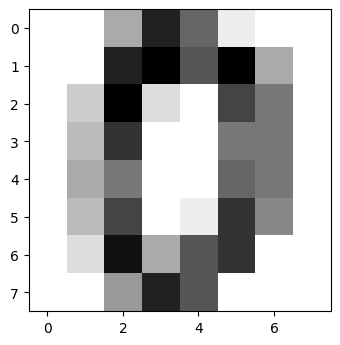

In [3]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

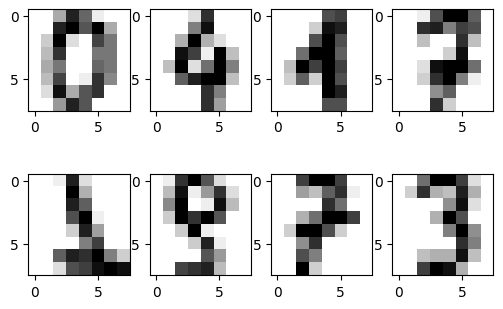

In [4]:
fig, ax = plt.subplots(2, 4)

ax[0, 0].imshow(data.iloc[0].values.reshape(8, 8), cmap='gray_r')
ax[0, 1].imshow(data.iloc[100].values.reshape(8, 8), cmap='gray_r')
ax[0, 2].imshow(data.iloc[200].values.reshape(8, 8), cmap='gray_r')
ax[0, 3].imshow(data.iloc[300].values.reshape(8, 8), cmap='gray_r')

ax[1, 0].imshow(data.iloc[1000].values.reshape(8, 8), cmap='gray_r')
ax[1, 1].imshow(data.iloc[1100].values.reshape(8, 8), cmap='gray_r')
ax[1, 2].imshow(data.iloc[1200].values.reshape(8, 8), cmap='gray_r')
ax[1, 3].imshow(data.iloc[1300].values.reshape(8, 8), cmap='gray_r')

## K Nearest Neighbors

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def train_test(k):
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    folds_accuracies = []
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        train_labels = labels.loc[train_index]
        test_features = data.loc[test_index]
        test_labels = labels.loc[test_index]
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_features, train_labels)
        predictions = knn.predict(test_features)
        accuracy = accuracy_score(test_labels, predictions)
        folds_accuracies.append(accuracy)
    return np.mean(folds_accuracies)

mean_accuracy = train_test(1)
print(mean_accuracy)

0.9888728037614452


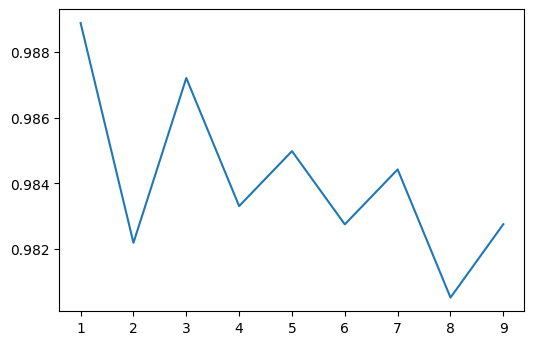

In [6]:
k_values = list(range(1,10))
k_accuracies = []
for k in k_values:
    k_accuracies.append(train_test(k))
    
plt.plot(k_values, k_accuracies)

The best accuracy comes from 1 nearest neighbor.

## Neural Network with One Hidden Layer

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dataquest/s

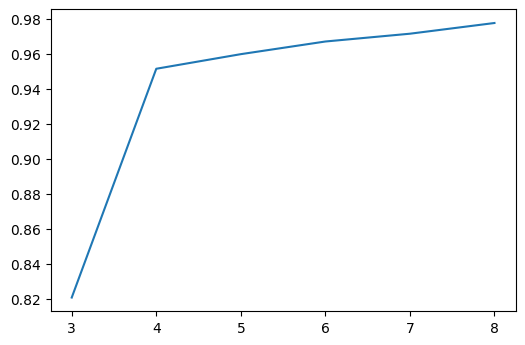

In [7]:
from sklearn.neural_network import MLPClassifier

def train_test(n):
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    folds_accuracies = []
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        train_labels = labels.loc[train_index]
        test_features = data.loc[test_index]
        test_labels = labels.loc[test_index]
        model = MLPClassifier(random_state=1, hidden_layer_sizes=(n,))
        model.fit(train_features, train_labels)
        predictions = model.predict(test_features)
        accuracy = accuracy_score(test_labels, predictions)
        folds_accuracies.append(accuracy)
    return np.mean(folds_accuracies)

n_values = list(range(3,9))
n_accuracies = []
for n in n_values:
    n_accuracies.append(train_test(2**n))
    
plt.plot(n_values, n_accuracies)

Compared to KNN, using a 1 layer network did not benefit us.

## Neural Network with Two Hidden Layers

In [8]:
from sklearn.neural_network import MLPClassifier

def train_test(n):
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    folds_accuracies = []
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        train_labels = labels.loc[train_index]
        test_features = data.loc[test_index]
        test_labels = labels.loc[test_index]
        model = MLPClassifier(random_state=1, hidden_layer_sizes=(n,n))
        model.fit(train_features, train_labels)
        predictions = model.predict(test_features)
        accuracy = accuracy_score(test_labels, predictions)
        folds_accuracies.append(accuracy)
    return np.mean(folds_accuracies)

print(train_test(64))

0.9705122494432071


## Neural Network with Three Hidden Layers

Since using more hidden layers is known to increase the amount of overfitting, we will remedy it by increasing the k-fold to 6.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/dataquest/s

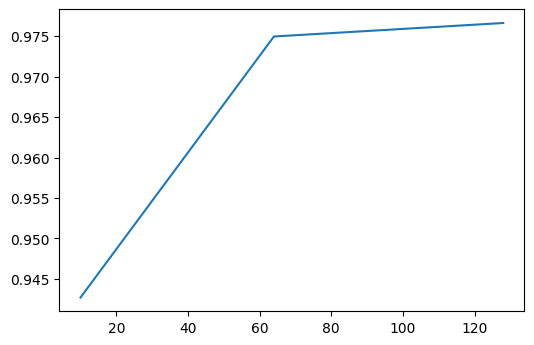

In [9]:
from sklearn.neural_network import MLPClassifier

def train_test(n):
    kf = KFold(n_splits=6, random_state=2, shuffle=True)
    folds_accuracies = []
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        train_labels = labels.loc[train_index]
        test_features = data.loc[test_index]
        test_labels = labels.loc[test_index]
        mobdel = MLPClassifier(random_state=1, hidden_layer_sizes=(n,n,n))
        model.fit(train_features, train_labels)
        predictions = model.predict(test_features)
        accuracy = accuracy_score(test_labels, predictions)
        folds_accuracies.append(accuracy)
    return np.mean(folds_accuracies)

n_values = [10, 64, 128]
n_accuracies = []
for n in n_values:
    n_accuracies.append(train_test(n))
    
plt.plot(n_values, n_accuracies)

Even with 3 layers it seems KNN is slightly more effective.